In [3]:
import os
print(os.getcwd())


/workspaces/b2b-customer-profitability-analysis/python/05_data_viz


In [4]:
import os
print(os.listdir('data/generated'))


FileNotFoundError: [Errno 2] No such file or directory: 'data/generated'

In [5]:
import os
print(os.getcwd())


/workspaces/b2b-customer-profitability-analysis/python/05_data_viz


In [6]:
import glob
for f in glob.glob('**/11_customer_lifetime_value.csv', recursive=True):
    print(f)


In [7]:
df = pd.read_csv('../../data/generated/11_customer_lifetime_value.csv')


In [8]:
import pandas as pd

df = pd.read_csv('../../data/generated/11_customer_lifetime_value.csv')

kpis = {
    "Total CLV (€)": df['CLV_EUR'].sum(),
    "Total Annual Profit (€)": df['AnnualProfit_EUR'].sum(),
    "Customer Count": df['CustomerID'].nunique(),
    "Avg CLV Margin (%)": df['CLVMargin_Pct'].mean()
}
print(pd.Series(kpis).round(2))


Total CLV (€)              5362169.56
Total Annual Profit (€)      82661.69
Customer Count                 440.00
Avg CLV Margin (%)              98.56
dtype: float64


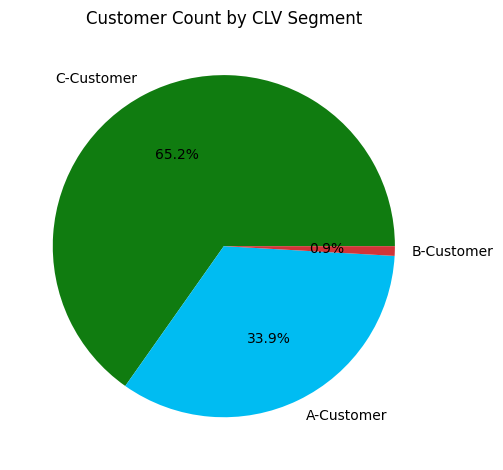

In [9]:
import matplotlib.pyplot as plt

clv_counts = df['CLVSegment'].value_counts()
clv_counts.plot.pie(autopct='%1.1f%%', colors=['#107C10', '#00BCF2', '#D13438'])
plt.title('Customer Count by CLV Segment')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [10]:
top10 = df.sort_values('CLV_EUR', ascending=False).head(10)
display(top10[['CustomerID', 'CLV_EUR', 'AnnualProfit_EUR', 'CLVSegment']])


,CustomerID,CLV_EUR,AnnualProfit_EUR,CLVSegment
85,CUST-086,600764.96,50897.08,A-Customer
47,CUST-048,447266.48,38105.54,A-Customer
86,CUST-087,422916.20,36076.35,A-Customer
61,CUST-062,401264.84,34272.07,A-Customer
333,CUST-334,357247.28,30603.94,A-Customer
211,CUST-212,325289.12,27940.76,A-Customer
65,CUST-066,308386.52,26532.21,A-Customer
251,CUST-252,300822.56,25901.88,A-Customer
23,CUST-024,270328.28,23360.69,A-Customer
56,CUST-057,252911.72,21909.31,A-Customer


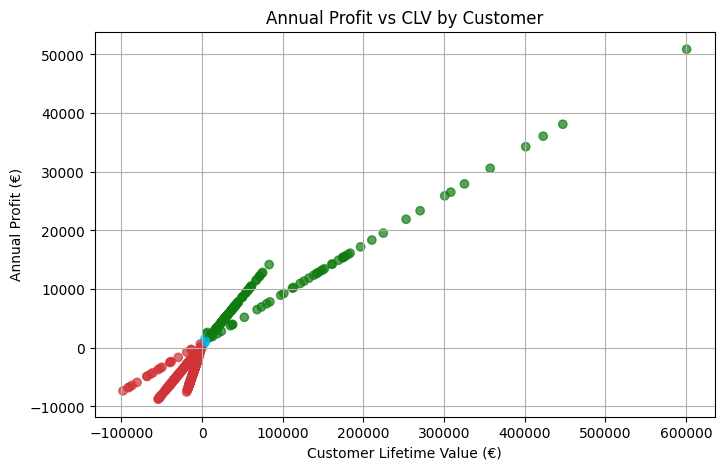

In [11]:
plt.figure(figsize=(8,5))
colors = df['CLVSegment'].map({'A-Customer':'#107C10', 'B-Customer':'#00BCF2', 'C-Customer':'#D13438'})
plt.scatter(df['CLV_EUR'], df['AnnualProfit_EUR'], c=colors, alpha=0.7)
plt.xlabel('Customer Lifetime Value (€)')
plt.ylabel('Annual Profit (€)')
plt.title('Annual Profit vs CLV by Customer')
plt.grid(True)
plt.show()


In [13]:
import pandas as pd

# Adjust the path as needed for each file
file_list = [
    '../../data/generated/11_customer_lifetime_value.csv',
    '../../data/generated/10_financial_p_l_orders.csv',
    '../../data/processed/01_customer_master.csv'
]

for f in file_list:
    try:
        df = pd.read_csv(f, nrows=5)
        print(f"\nColumns in {f}:")
        print(df.columns.tolist())
    except Exception as e:
        print(f"{f} - ERROR: {e}")



Columns in ../../data/generated/11_customer_lifetime_value.csv:
['CustomerID', 'CustomerName', 'CustomerSegment', 'AnnualProfit_EUR', 'OrderCount', 'ExpectedLifetime_Years', 'AcquisitionCost_EUR', 'CLV_EUR', 'CLV_NPV_EUR', 'PaybackMultiple', 'CLVMargin_Pct', 'CLVSegment', 'RecommendedAction']

Columns in ../../data/generated/10_financial_p_l_orders.csv:
['TransactionID', 'CustomerID', 'CustomerSegment', 'ProductCategory', 'OrderMonth', 'PaymentTerms', 'IsStandardOrder', 'IsUrgent', 'TransactionAmount', 'COGS_EUR', 'WarehouseCost_EUR', 'ShippingCost_EUR', 'ReturnsCost_EUR', 'InterestCost_EUR', 'OverheadCost_EUR', 'TotalCost_EUR', 'Profit_EUR', 'ProfitMargin_Pct', 'CostToRevenue_Pct', 'ProfitabilityCategory', 'ShouldRaisePrice', 'ShouldReduceCost', 'ShouldReviewCustomer']

Columns in ../../data/processed/01_customer_master.csv:
['CustomerID', 'CustomerName', 'OriginalChannel', 'ChannelName', 'OriginalRegion', 'RegionName', 'AnnualFreshSpending', 'AnnualMilkSpending', 'AnnualGrocerySpend